# 1) Carga del dataset Titanic desde OpenML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Cargamos el dataset Titanic
titanic_bunch = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic_bunch.frame.copy()  # Obtenemos el DataFrame completo
print(f"Dimensiones originales: {df.shape}")

# Veamos las primeras filas
df.head()


Dimensiones originales: (1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
df.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# 2) Exploración inicial de los datos

## 2.1 Revisar valores faltantes

In [3]:
df.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## 2.2 Tipos de datos

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


## 2.3 Estadísticas descriptivas

In [5]:
df.describe(include='all')


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,2,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,0,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,809,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,NaN,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,NaN,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,NaN,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,NaN,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,NaN,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


## 2.4 Distribuciones y outliers

Podemos mirar la distribución de, por ejemplo, age y fare:

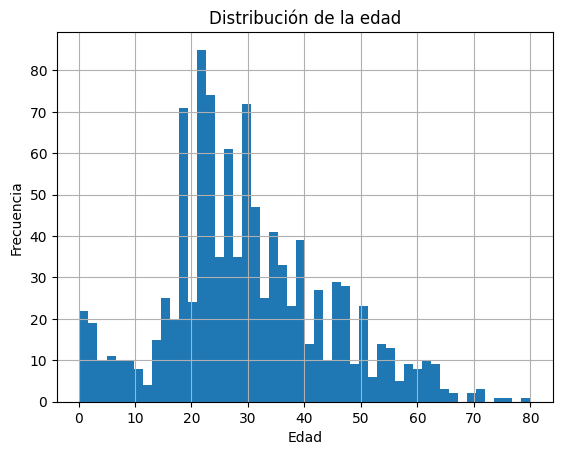

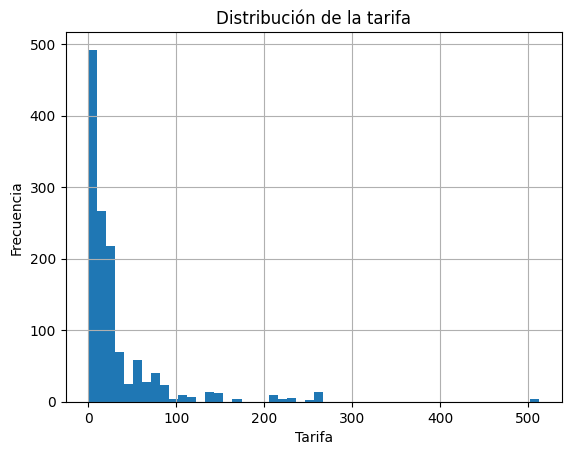

In [6]:
plt.figure()
df['age'].hist(bins=50)
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
df['fare'].hist(bins=50)
plt.title("Distribución de la tarifa")
plt.xlabel("Tarifa")
plt.ylabel("Frecuencia")
plt.show()


# 3) Limpiar y seleccionar columnas de interés

Supongamos que queremos predecir la columna survived. Antes de aplicar transformaciones, seleccionemos columnas principales y descartemos columnas con mucha información faltante o que sean irrelevantes para la predicción.

Ejemplo: seleccionamos estas columnas:

survived (nuestra variable objetivo)

pclass

sex

age

sibsp

parch

fare

embarked

In [7]:
cols = ["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
df = df[cols]
print(f"Dimensiones tras selección: {df.shape}")
df.head()


Dimensiones tras selección: (1309, 8)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


# 4) Ejemplos de transformaciones frecuentes

## 4.1 Manejo de valores faltantes

1. Eliminar filas con valores faltantes en ciertas columnas.

2. Imputar (rellenar) con la media, mediana o algún valor fijo (por ejemplo, para edad).

3. Categorizar los valores nulos como una nueva categoría (para variables categóricas).

### 4.1.1 Manejo de valores faltantes en age

Podríamos, por ejemplo, imputar la edad faltante con la mediana:

In [9]:
median_age = df["age"].median()
df["age"].fillna(median_age, inplace=True)


/tmp/ipykernel_693150/1300786744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(median_age, inplace=True)


### 4.1.2 Manejo de valores faltantes en embarked

Para embarked (puerto de embarque), podemos:

- Rellenar con la moda (la categoría más frecuente).

- O eliminar filas que no tienen embarked.

In [8]:
mode_embarked = df["embarked"].mode()[0]
df["embarked"].fillna(mode_embarked, inplace=True)


/tmp/ipykernel_693150/4074252998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(mode_embarked, inplace=True)


## 4.2 Transformaciones de datos numéricos

### 4.2.1 Detección y tratamiento de outliers

Tomemos la columna fare como ejemplo. Si vemos valores extremadamente altos, podemos capar (capping) esos valores por un percentil (por ejemplo, 99%). Esto reduce el impacto de valores anómalos muy grandes:

In [10]:
upper_cap = df["fare"].quantile(0.99)
df.loc[df["fare"] > upper_cap, "fare"] = upper_cap


### 4.2.2 Transformación de escala (log transform)

Cuando una distribución está muy sesgada a la derecha (como fare suele estar), a veces aplica hacer log1p (logaritmo de (x+1)):

In [11]:
df["fare_log"] = np.log1p(df["fare"])


## 4.3 Transformaciones de datos categóricos

### Codificación one-hot (One-Hot Encoding)

Para variables cualitativas sin orden (por ejemplo, sex, embarked), podemos generar variables dummies.

In [12]:
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)


drop_first=True elimina una de las categorías para evitar colinealidad

Generará columnas como sex_male, embarked_Q, embarked_S (asumiendo que se elimina la categoría más frecuente).

### 4.3.2 Codificación ordinal

La variable pclass (clase de pasajero) sí tiene un orden natural (1 < 2 < 3 en cuanto a “clase de lujo”). A veces, es preferible conservarla como numérica (1, 2, 3). O si llega como texto, podríamos mapearla manualmente:

In [ ]:
# Si viniera como strings "1", "2", "3"
# df["pclass"] = df["pclass"].astype(int)

# O usando map 

# df["pclass"] = df["pclass"].map({"1": 1, "2": 2, "3": 3})


# 5) Revisión final de los datos tras transformaciones

In [13]:
print("Cantidad de nulos tras las imputaciones:")
print(df.isnull().sum())

print("\nVista general de las primeras filas post-transformaciones:")
df.head()


Cantidad de nulos tras las imputaciones:
survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          1
fare_log      1
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

Vista general de las primeras filas post-transformaciones:


,survived,pclass,age,sibsp,parch,fare,fare_log,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,5.358177,False,False,True
1,1,1,0.9167,1,2,151.5500,5.027492,True,False,True
2,0,1,2.0000,1,2,151.5500,5.027492,False,False,True
3,0,1,30.0000,1,2,151.5500,5.027492,True,False,True
4,0,1,25.0000,1,2,151.5500,5.027492,False,False,True


Observamos que:

- Hemos reducido/eliminado la mayoría de los valores nulos en age y embarked.

- Hemos creado una nueva columna fare_log.

- Hemos generado columnas dummies para sex y embarked.

- El tamaño del DataFrame ha cambiado por la expansión de columnas.

## 5.1 Distribuciones tras las transformaciones

Podemos volver a revisar, por ejemplo, cómo quedó la distribución de la columna transformada fare_log:

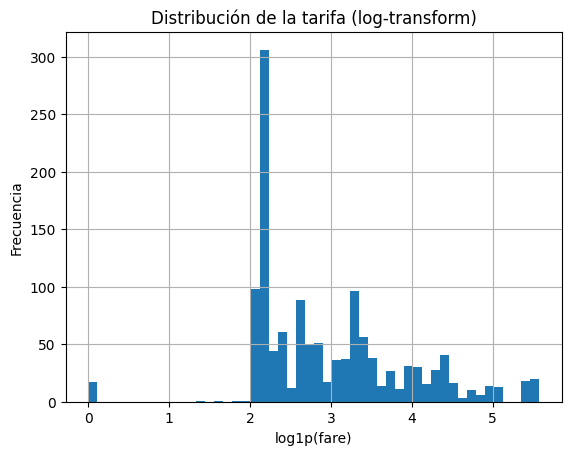

In [14]:
plt.figure()
df['fare_log'].hist(bins=50)
plt.title("Distribución de la tarifa (log-transform)")
plt.xlabel("log1p(fare)")
plt.ylabel("Frecuencia")
plt.show()


Se vuelve más cercana a algo “normal” (más simétrica).